  ## This function is part 1 of the assignment, it checks if a number is a prime number.

  #### Args: `n` as the number to check.

  #### Returns: A boolean value, True if the number is prime, False otherwise.

  The function first check if the number is greater than 1 because by defenition, prime numbers are integers **greater than one** with no positive divisors besides one and itself. If it's negative or zero, return `False`.

  We declare `sqrt_n` as square root of the number.

  And then we write a for loop to check if the number is divisible by any number between 2 and the square root of the number. If we find any, it's not a prime number, return `False`.

  If we didn't find any factor, then it's a prime number, return `True`.

In [17]:
def is_prime(n):
  if n <= 1:
    return False

  sqrt_n = int(n ** 0.5)

  for i in range(2, sqrt_n + 1):
    if n % i == 0:
      return False
  return True


## This code is part 2 for the assingment, it utilized previous code into a one-liner
First, wrtie the for loop into `all()` function to check if everything in between matches.

And then put sqrt_n into `range()` as a veriable.

In [18]:
def is_prime(n):
  return n > 1 and all(n % i for i in range(2, int(n ** 0.5) + 1))

Test it, it works!

In [19]:
is_prime(7)

True

## Below three cells are self-learning code that will return if a number is a prime number, where the answer is not always correct
## It's a set of code that improves the result by running, the more it runs, the higher correct-rates it gets
Under most of the cases when inputs are random, the starting correct-rate is 50%, and hit 95% of the correct rate when execution times hits 1/10 of the sample range.

For example, for a input range of random number between 1 to 1000, the correct-rate starts at 50% at the 10th execution, and hits 95% of correct rate at 100th execution.

I'll visualize the learning process and improvements in the following sections.

 #### This chunck of code is a function called `factors()`. It takes a integer and returns all of its factors. This is a support function for the next chunck.

  #### Args: `n` as the number to find factors.

  #### Returns: A set of nunmbers of `n`'s prime factors.
First thign first, declare this function. The function works by first creating a set called factors to store the factors of n.

It then iterates over the numbers from 2 to the square root of `n`, inclusively. For each number i, the function checks if `n` is divisible by i.  If it is, the function adds i to the set factors and then divides n by i.

And then checks if n is still greater than 1 after the loop has finished iterating. If it is, the function adds n to the set factors.

The while loop will continue to iterate until n is no longer divisible by i.
FInally, returns factors set.

In [20]:
def factors(n):
  factors = set()
  for i in range(2, int(n ** 0.5) + 1):
    while n % i == 0:
      factors.add(i)
      n //= i
  if n > 1:
    factors.add(n)
  return factors

## This chunck of code is the method of assignment part 3. It takes a integer input and returns if a number is prime number.

  #### Args: `n` as the number to check if it's a prime number.

  #### Returns: A Boolean of True or False.

In order to learn by running, it has to memorize the outputs from previous executions. Let's say, filter the visited prime number in a set called `visited`.

At first, I have no sample. As all of the even number has a factor of 2, I'll guess all even number as `False`, and all odd numbers as `True`. I sorted this answer in `this_ans` for later output.

Note that when I return `False`, it must be correct; when I return `True`, there are two possibilities: (1) it is a prime number, (2) it's not a prime number but I haven't learn it.

In order to "learn", I need to validate the answer, so I called `is_prime()` method in part one. If my answer for this guess is right, I'll set `validate_ans` boolean into `True`, otherwise `False`. In other words, `True` means the first(1) senerio, `False` means the second(2) from above.

For those who is a prime number, I'll add it to visited; for those who's not a prime number, it must had some prime factors. I called the `factors()` method from above chunck, and put these prime factors into `visited` to speed up the learning process.

Since I have some more samples in `visited`, I also check in else if to see if I've seen this number before each time I run.

In [21]:
visited=set({})

def learn_prime(n):
  global visited
  this_ans=True

  if(n%2==0 and n!=2):
    this_ans = False
  elif(n in visited):
    this_ans = True

  else:
    for x in visited:
      if n%x==0: this_ans = False

    validate_ans = (is_prime(n)==this_ans)
    if validate_ans==True:
      visited.add(n)
    else:
      visited=visited|factors(n)

  return this_ans

### I called `random` library to generate a random number, and print out the results from `learn_prime()`.

Test it, it works.

In [22]:
import random
ran = random.randint(0,100)
print(learn_prime(ran))
print(visited)

False
set()


### In order to see above code better and proof the correctness, I wrote this function called `correct-rate()`.

This block of code is identical to the one aboved, expect it returns correc-rate rather than True or False.

To calculate the correct rate, I added two varibles: `executed` and `correct`.

Firstly, when ever called, execution times increased by one: `executed+=1`.

Then, consider the correct cases:


1.   all even number expect 2 must not be prime, if I access this condition,  it must be correct: `correct+=1`.
2.   if I have seen this number, or his factors, before and put it in `visited` after validating it, it must be a prime muber: `correct+=1`.
3.   I haven't seen it, I guess `True` by default, and turns out it is a prime number: `correct+=1`.



In [23]:
visited=set({})
executed=0
correct=0

def correct_rate(n):
  global visited, executed, correct
  this_ans=True
  executed+=1

  if(n%2==0):
    this_ans = False
    correct+=1
  elif(n in visited):
    this_ans = True
    correct+=1

  else:
    for x in visited:
      if n%x==0: this_ans = False

    validate_ans = (is_prime(n)==this_ans)
    if validate_ans==True:
      visited.add(n)
      correct+=1
    else:
      visited=visited|factors(n)

  return correct/executed

### To better visualize the correct rate as it iterate through time, I draw a line chart in this chunck.
In this chart, the x-axis is the times of execution, and the y-axis is the correction rate.
Here are the screenshots of some of the results.
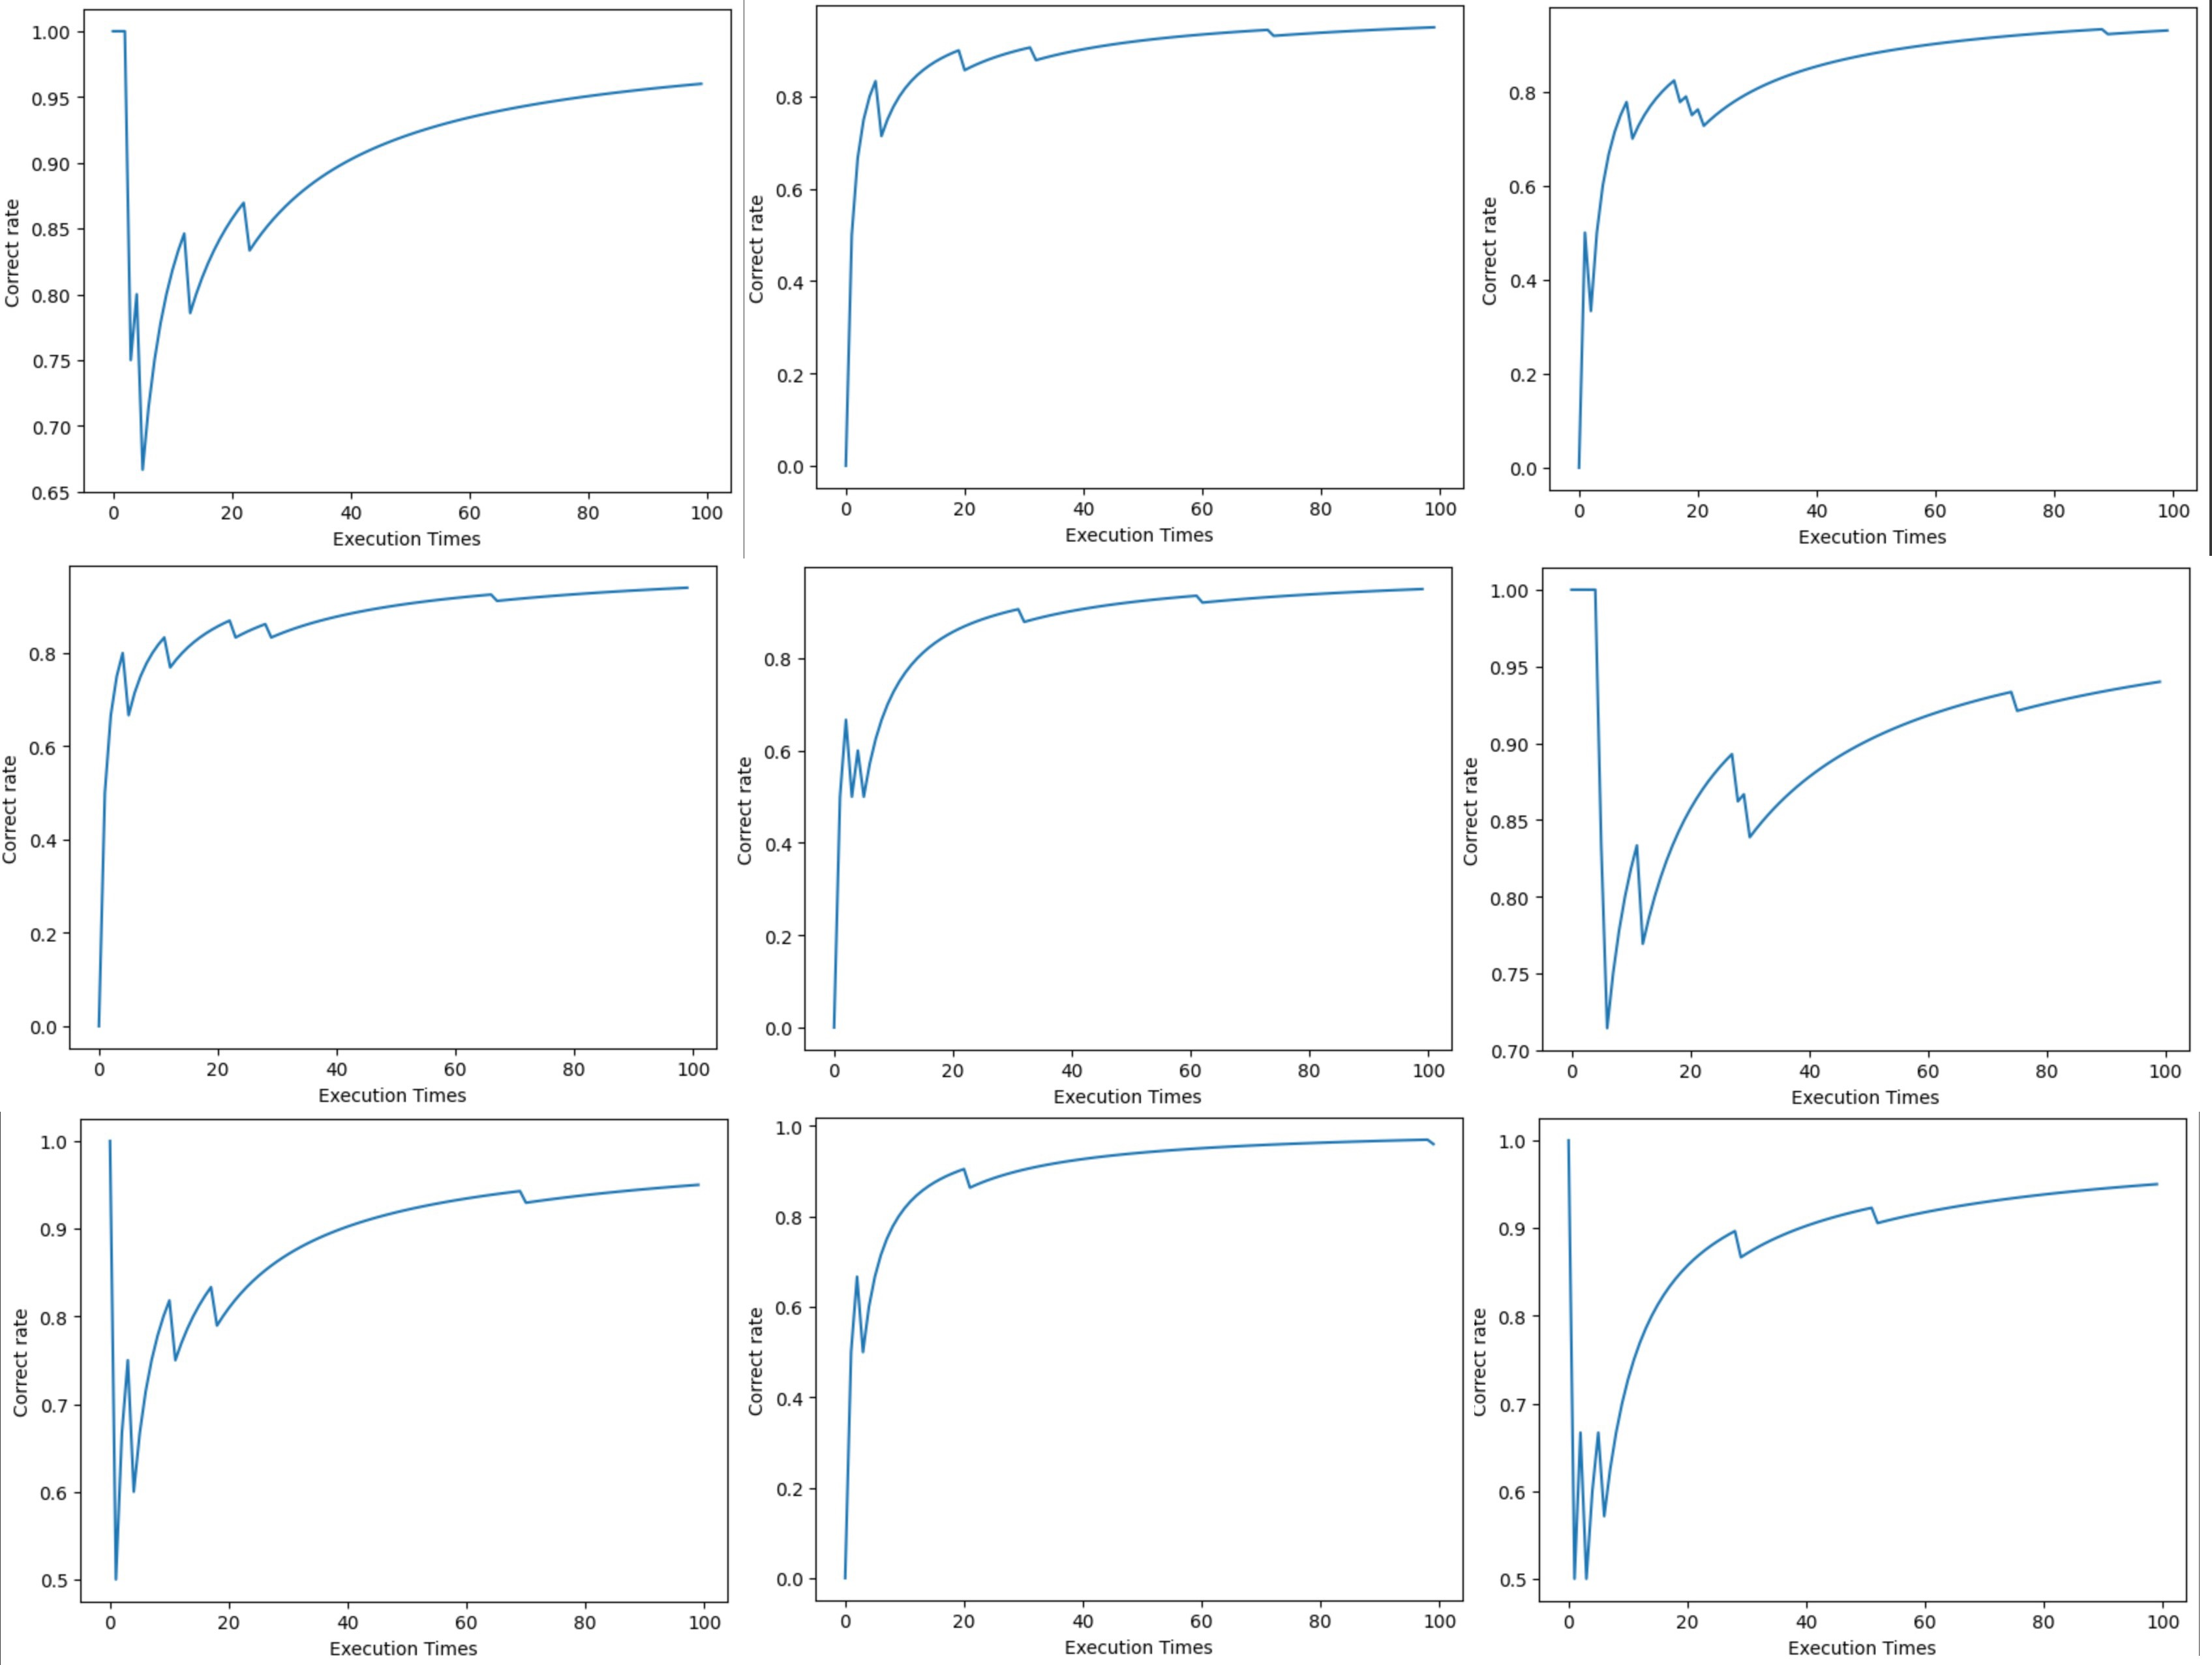

As we can see, in most of the cases, the learning speed started growing expotentially after 30 executions. I can garuntee that, in 95% of the time, the correct rate would excess 95% when the execution times hits 1/10 the sample size

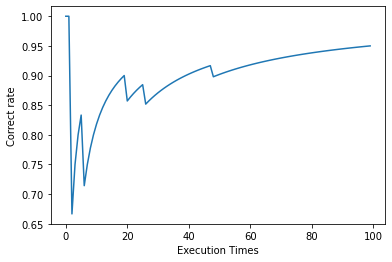

In [24]:
import random
import matplotlib.pyplot as plt

plot_x=[]
plot_y=[]

for i in range(100):
    ran = random.randint(0,1000)
    y=correct_rate(ran)
    plot_x.append(i)
    plot_y.append(y)

plt.plot(plot_x, plot_y)
plt.xlabel("Execution Times")
plt.ylabel("Correct rate")

plt.show()


## Future Works

Sort the set everytime when putting in new numbers and check if `n**0.5>visit(i)`, ignore every guy after that.

This might be a trade off between sample range and run-time, as sorting takes a lot calculating power, it's only worth it when the sample range is big enough.

It would be an interesting topic to work on, to find the crossing point of when I should start sorting `visited`.

## Conclusion and Final Thought

In most of the time, a self-learning code requires a validation step that gives a feedback on wheather this execution was correct or one. And then, by memorizing the elements from previous results, it increased the data and expands its ability to answer the next execution.

My function on this assignment based on the assumption that input numbers are **random** and **finite**. If we intentionally input edge cases, square of prime number(x^2), it is not going to work.

For example, if my input is 1, 9, 25, 49, 121, 169, 289, 361, 529, 841, etc..., the correct-rate would keep decreasing. As it could not could not learn from the previous outputs.

A good way to solve this case is to change the first if statement into randomly picking a boolean value.

```
  if(n%2==0 and n!=2):
    this_ans = False
```
into:
```
   this_ans = bool(random.getrandbits(1))
```
However, this is a trade off between learning-speed and accuratly completing the requirements in assignment discriptions.

In considering "which works sometimes or most of the time (at least half of the time)" in the assignment discriptions, the second will better fit this requirment as generating a random boolean is the real "works half of the time".

To sum up, the first if statement implys that we already know even number can not be a prime number, whereas in the second statement, all its experiances came from learning.